In [1]:
import numpy as np

fruits = np.load('data/fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [3]:
pca.components_.shape

(50, 10000)

In [4]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)

    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10

    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

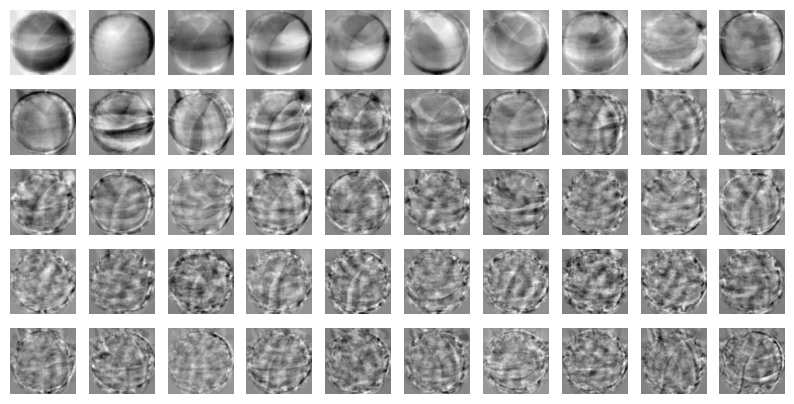

In [5]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [6]:
fruits_2d.shape

(300, 10000)

In [7]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 50)

In [8]:
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

(300, 10000)

In [9]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

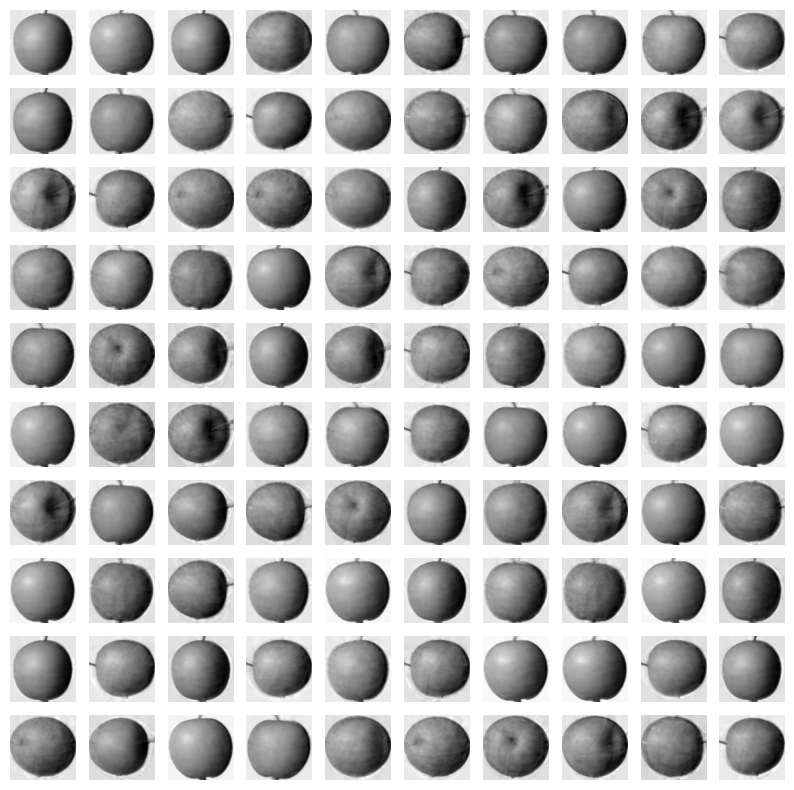

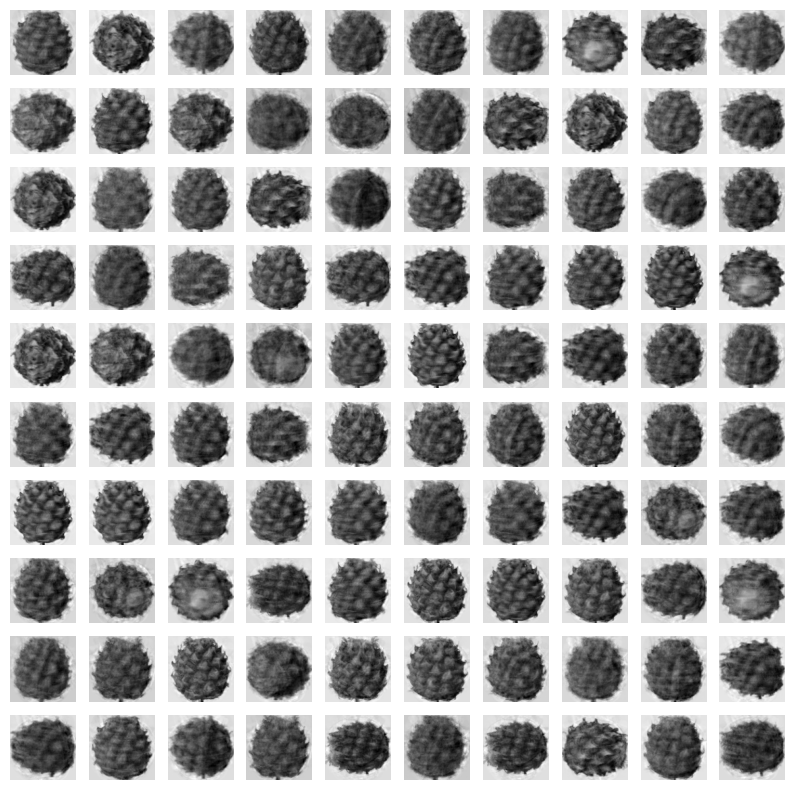

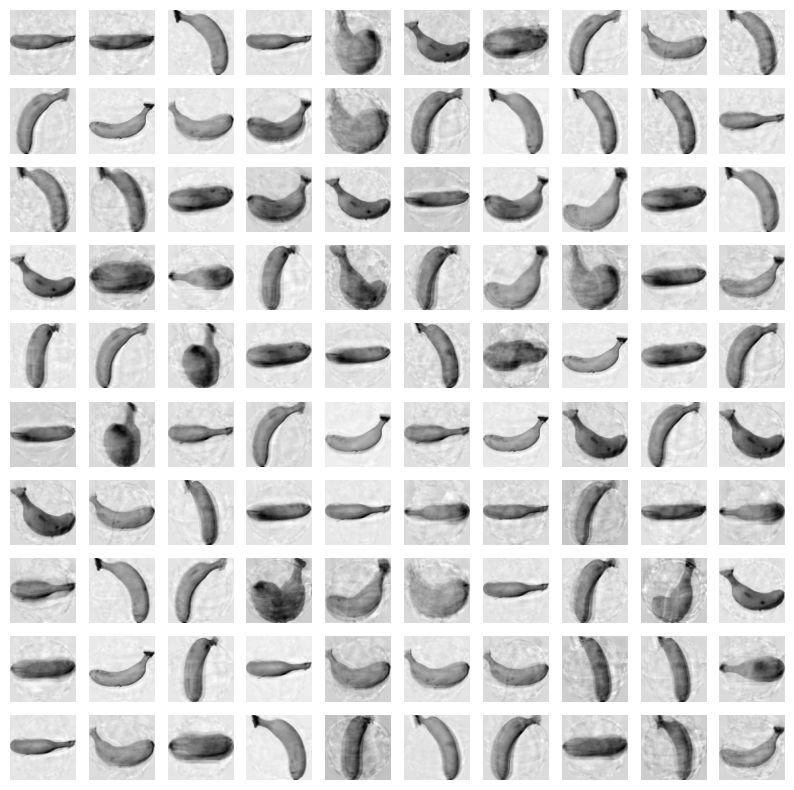

In [10]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print('\n')


In [11]:
pca.explained_variance_ratio_

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578895, 0.00511201, 0.00486382, 0.00480346,
       0.00447837, 0.00437315, 0.00408031, 0.00389477, 0.00372438,
       0.00359286, 0.00331397, 0.00317784, 0.00304301, 0.00303528,
       0.0028885 , 0.00275825, 0.00264983, 0.00255688, 0.00251557,
       0.00247369, 0.00238977, 0.00230955, 0.00221903, 0.00214236,
       0.00213161, 0.00195468, 0.00191773, 0.00190596, 0.00184525,
       0.00182103, 0.00173419, 0.00168212, 0.00161688, 0.00155582])

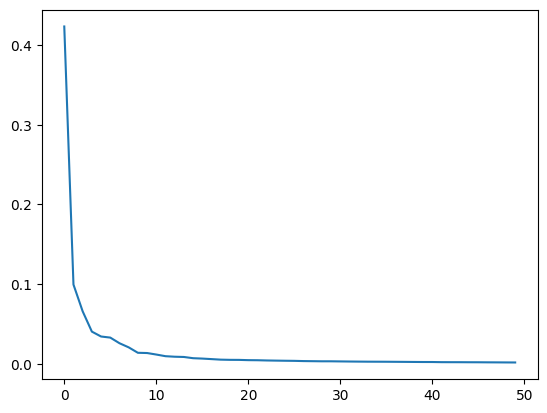

In [12]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
lr = LogisticRegression()

In [15]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [16]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
scores

{'fit_time': array([0.22681522, 0.15305209, 0.19117689, 0.1702919 , 0.16778445]),
 'score_time': array([0.        , 0.01443386, 0.00199366, 0.00189662, 0.00174308]),
 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}

In [17]:
scores = cross_validate(lr, fruits_pca, target)
scores

{'fit_time': array([0.00624323, 0.00598669, 0.00755668, 0.00491953, 0.00431418]),
 'score_time': array([0.00099492, 0.        , 0.00216246, 0.        , 0.        ]),
 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}

In [18]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [19]:
pca.n_components_

2

In [20]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 2)

In [21]:
scores = cross_validate(lr, fruits_pca, target)
scores

C:\Users\2-15\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\2-15\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

{'fit_time': array([0.03816032, 0.01200366, 0.00095797, 0.01968074, 0.01264644]),
 'score_time': array([0.0019927 , 0.00095773, 0.        , 0.00100923, 0.        ]),
 'test_score': array([0.96666667, 1.        , 1.        , 0.98333333, 1.        ])}

In [22]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km.fit(fruits_pca)
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2]), array([ 91,  99, 110], dtype=int64))

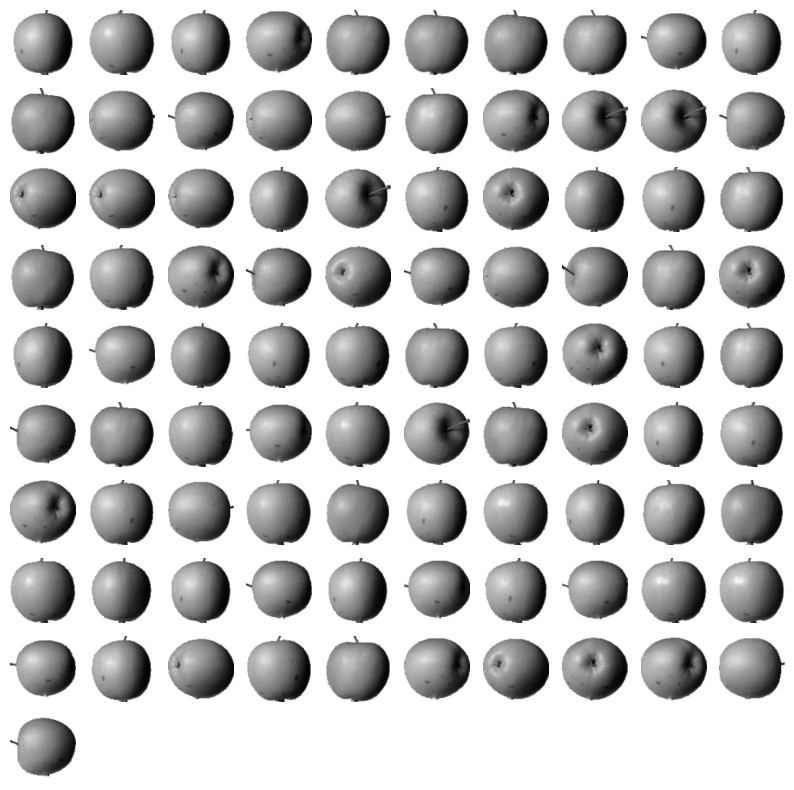

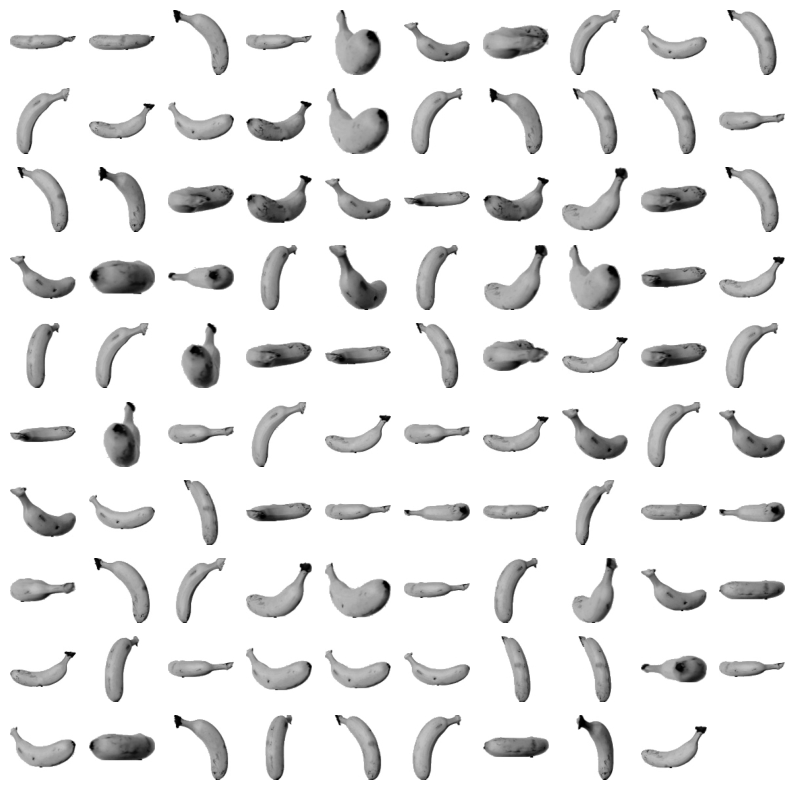

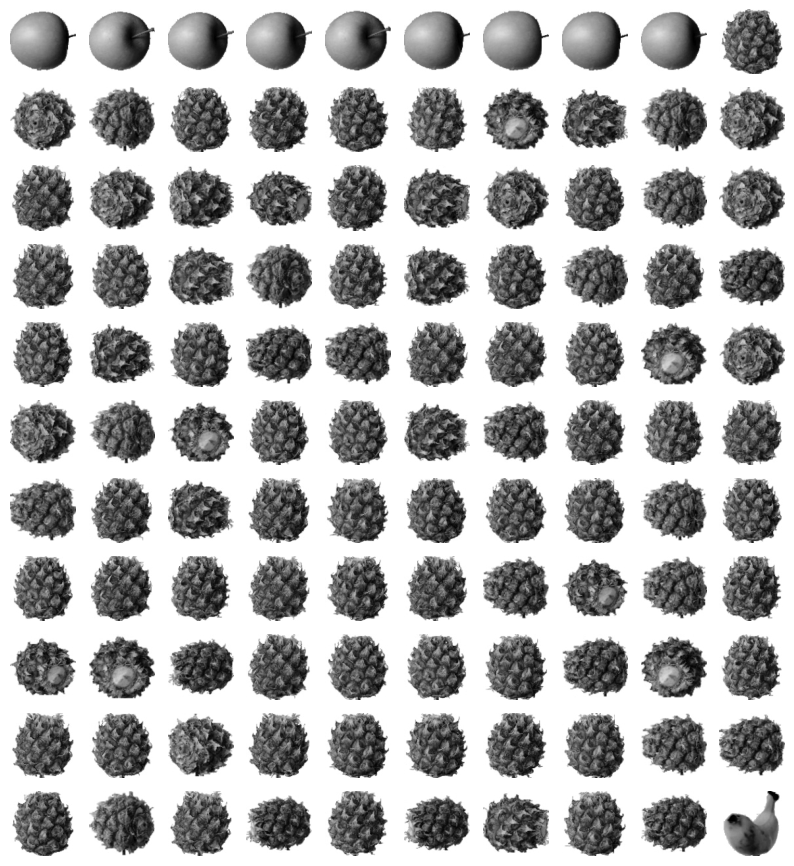

In [23]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print('\n')

[2778.41779459 3078.27365136 2620.61072939 3113.71771062 2520.64705144
 2711.38755162 2884.74283654 2310.99240338 1521.26665012 2486.91643797
 2800.83912843 2810.56248913 2209.09841637 2917.38810303 2198.1718942
 2317.61818126 3289.84664277 3563.8760831  3708.64597097 2423.96625858
 3169.13983546 3059.33441459 2745.8264558  3185.62291444 2971.17053083
 2787.48896668 3498.88592281 3260.68825045 2623.54750342 2307.99121345
 3252.36170036 3084.49971083 3201.14329072 2608.40877513 3390.8727361
 1924.69875845 2972.89461453 3093.63044684 2362.84106804 3454.4640671
 2963.2919212  1849.83696122 3331.10399431 2512.78278467 3055.78042415
 2402.09327255 2940.30972889 3015.21904761 2451.83076426 2310.61720894
 2510.66697894 2633.2859714  3080.23345665 2123.66302259 3072.09843543
 3617.74117713 2681.08615892 3497.79088896 2506.71316197 2673.05168548
 3118.54949968 2812.96562258 2543.74538773 3089.33634796 3224.61944762
 2467.30785632 3032.79280015 3026.09382353 2648.69153262 3326.48080034
 3094.562

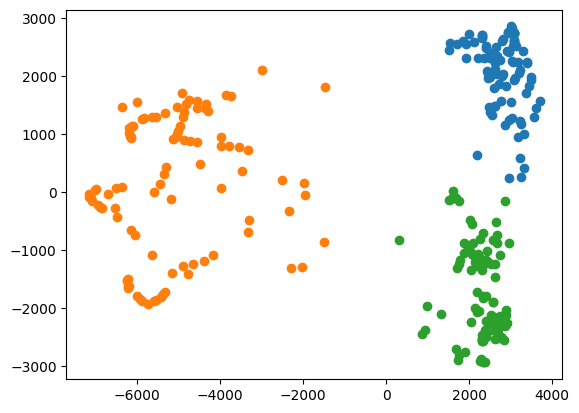

In [24]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:, 0], data[:, 1])
    print(data[:, 0])

plt.show()